# Phase 1

## Dataset Description

### **Survey on Overseas Filipinos 2015**
Last October of 2015, the Philippine Statistics Authority (PSA) created a dataset on a Survey on Overseas Filipinos (SOF). The survey was designed to gather data on the amount of overseas Filipino workers (OFW) along with their socio economic characteristics and other information related to working abroad from April to September. The remittances of the OFWs were also taken into account for the specified period. 


### **Collection Process**
**Sampling Procedure** <br>
**The SOF used the sampling design of the 2003 Master Sample for Household Surveys.*
1. `Domain` - **each of the country's 17 administrative regions** were considered as a domain for this survey
2. `Sampling Frame` - the primary sampling units (PSU) were defined as a **barangay or a combination of barangays with at least 500 households**
3. `Sample Size` - **2,835 PSUs** (330 certainty PSUs, 2,505 non-certainty PSUs)
4. `Stratification` - the **17 regions** of the country were considered as the primary strata
5. `Sample Selection` - **divided into 4 sub-samples** with probability proportional to some estimated measure of size of the total number of households from the 2000 CPH

**Data Collection**
- `Dates of Collection` - 2015-10-08 (October 8, 2015) - 2015-10-30  (October 8, 2015)
- `Mode of Data Collection` - Face-to-face (F2F)
- `Data Collection Supervision` - **supervisors** are required to have an itinerary of travel for efficiency and security, a copy of the said itinerary is also available in the field office in case of emergencies. Supervisors are also the ones who are tasked with taking action in any problems that may arise hence regional directors and provincial statistical officers are encouraged to visit them to rate their progress.
- `Questionnaires` - **SOF Form 2** is the household (HH) control form and is the basis to determine households with members that is overseas. HHs with overseas members in the specified time period were given the SOF Form 1. The other questionnaire, SOF Form 1, is designed to gather data on the number of overseas Filipinos, their socio-economic characteristics, and their remittances.
- `Data Collectors` - Philippine Statistics Authority (PSA)
  


### **Data Collection Implications**
The data collection implies that the resulting conclusions and insights will be related to `socio-economic characteristics, the migration patterns of OFWs, and the OFWs' remittance behaviors`.<br>
There are some variables that are directly defines OFWs' socio-economic characteristics like RQ8_HGRADE (Highest Grade Completed) while some like RQ19_REASON (Reason for returning in the country) may suggest or prove their current standing.<br>
As for the migration patterns, variables starting with RQ10 to RQ20 are related to going abroad and their length of stay overseas. It also includes the reasons for leaving or returning to the country, the expected and actual dates of returning home, the kind of work abroad, and how long they worked for overseas.<br>
Lastly, for the remittance behaviors, variables starting with RQ21 to RQ24 are all remittance-related with 2 variables stating the amount received, the mode of remittance, and the amounts of remittance spent on certain categories. 


### **Dataset Structure**
The survey on overseas Filipinos' data structure contains the overseas Filipino (OF) identifier and his or her data related to the survey. There are exactly `5440 observations` in the dataset each representing `1 OF which is placed per row` of the data frame. Each row contains their personal information, information about leaving or staying abroad, and data on their remittances. On the other hand, `*each column represents the values of the OFs per variable`. This particular dataset contains `48 variables`, 2 of which are used as identifiers, namely RREG (Region) and HHNUM (Unique HH Serial Number).


### **Variables**
**Overseas Filipino Identification Variables**
- `RREG` - Region
- `HHNUM` - Unique household serial number

**Survey Variables**
- `RRPL` - Replicate
- `RSTR` - Stratum
- `RPSU` - PSU Number
- `RROTATION` - Rotation Group
- `RQ1_LNO` - Line Number
- `RQ2_REL` - Relationship
- `RQ3_SEX` - Sex
- `RQ4_AGE` - Age
- `RQ5_TMSLEFT` - Times left
- `RQ6M_DTLEFT` - Date left (Month)
- `RQ6Y_DTLEFT` - Date left (Year)
- `RQ7_MSTAT` - Marital Status
- `RQ8_HGRADE` - Highest Grade Completed
- `RQ9_USOCC` - Usual occupation
- `RQ10_REASON` - Reason for leaving
- `RQ11_BASE` - Land-based or sea-based worker
- `RQ12_CTRY` - Country intend to stay
- `RQ13_STAY` - Months planning to stay
- `RQ14_INDWORK` - Had a job/business anytime
- `RQ15_OCCUP1` - Kind of work abroad 
- `RQ16_NOMONTH` - Number of months worked
- `RQ17_RET` - Has returned home
- `RQ18M_DTRET` - Date returned home (Month)
- `RQ18Y_DTRET` - Date returned home (Year)
- `RQ19_REASON` - Reason for returning in the country
- `RQ20M_DTEXP` - Date expected to return home (Month)
- `RQ20Y_DTEXP` - Date expected to return home (Year)
- `RQ21_CASHREM` - Remittance recieved
- `RQ22_CASHAMT` - Cash remittance receieved
- `RQ23_MODE` - Mode of remittance
- `RQ241C_CONSUM` - Was the remittance spent for Consumption?
- `RQ241P_CONSUM` - Percent of Remittance spent for Consumption 
- `RQ242C_INVEST` - Was the remittance was spent for Investments?
- `RQ242P_INVEST` - Percent of Remittance spent for Investments
- `RQ243C_SAVINGS` - Was the remittance was spent for Savings?
- `RQ243P_SAVINGS` - Percent of Remittance spent for Savings
- `RQ244C_GIFT` - Was the remittance was spent for Gifts?
- `RQ244P_GIFT` - Percent of Remittance spent for Gifts
- `RQ245C_OTHERS` - Was the remittance was spent for Other reasons?
- `RQ245P_OTHERS` - Percent of Remittance spent for Others
- `RQ25_RET6MOS` - Returned during the period April to September 2015
- `RQ26_CASHHOME` - Cash brought home
- `RQ27_INKIND` - Receive goods/products
- `RQ28_KINDAMT` - Total imputted value of goods/products
- `RSWGT` - Weight
- `RP6M_IND` - Past Six Months Indicator

In [62]:
#IMPORTS

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


from scipy.stats import zscore
from scipy import stats
from scipy.stats import chi2_contingency


In [63]:
#LOAD SOF PUF 2015 FILE

file_path = 'SOF PUF 2015.csv'
data = pd.read_csv(file_path)

## Data Cleaning

The dataset has a few duplicates which need to be removed to ensure data integrity. These duplicates can be found by tracking for rows that have identical `HHNUM` (unique household identifiers) and `RQ1_LNO` (household line number) which, when combined, should identify a unique person.

In [64]:
# clean duplicates
# `keep = first`, as it's likely that changes (if any) to other values may be an attempt at an update
data.drop_duplicates(["HHNUM", "RQ1_LNO"], keep = "first", inplace = True)

# To verify that these duplicates are in fact gone:
data[data.duplicated(["HHNUM", "RQ1_LNO"], False)]

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND


In addition, the dataset also contains overseas Filipinos who are not workers. These can be removed by checking whether `RQ14_INDWORK` (independent workers) is true, and checking whether their reason for leaving is due to being a contract or non-contract worker (integer codes 1 and 2).

In [65]:
# the dataset also contains people who have been to other countries that are not Overseas Filipino /Workers/ 
# drop all non-working OFW people
data = data[data["RQ14_INDWORK"] == True]
data = data.loc[data['RQ10_REASON'] <= 2]

### Mapping data
Many columns in this dataset are encoded as integer values. To make them more human-readable, they should be converted into strings. The rows below turn these columns into categories, then renames the integer codes to a readable string format.

In [66]:
data["RREG"] = data['RREG'].astype("category").cat.rename_categories({
    1: "Ilocos",
    2: "Cagayan Valley",
    3: "Central Luzon",
    41: "CALABARZON",
    42: "MIMAROPA",
    5: "Bicol",
    6: "Western Visayas",
    7: "Central Visayas",
    8: "Eastern Visayas",
    9: "Zamboanga",
    10: "Northern Mindanao",
    11: "Davao",
    12: "SOCCKSARGEN",
    13: "National Capital Region",
    14: "Cordilleras",
    15: "Bangsamoro", # ARMM in 2015
    16: "CARAGA",
    # Negros Island Region didn't exist yet
})

In [67]:
data["RQ3_SEX"] = data['RQ3_SEX'].astype("category").cat.rename_categories({
    1: "Male",
    2: "Female",
})

In [68]:
data["RQ8_HGRADE"] = data['RQ8_HGRADE'].astype("string").map({
    "1": "Elementary undergraduate",
    "2": "Elementary graduate",
    "3": "High school undergraduate",
    "4": "High school graduate",
    "5": "Technical-vocational undergraduate",
    "6": "College undergraduate",

    # these values represent distinct graduate degrees, probably defined by PSOC 1992
    # merging them
    "50": "Technical-vocational graduate",
    "51": "Technical-vocational graduate",
    "52": "Technical-vocational graduate",
    "53": "Technical-vocational graduate",
    "54": "Technical-vocational graduate",
    "55": "Technical-vocational graduate",
    "56": "Technical-vocational graduate",
    "57": "Technical-vocational graduate",
    "58": "Technical-vocational graduate",
    "59": "Technical-vocational graduate",
    "60": "College graduate",
    "61": "College graduate",
    "62": "College graduate",
    "63": "College graduate",
    "64": "College graduate",
    "65": "College graduate",
    "66": "College graduate",
    "67": "College graduate",
    "68": "College graduate",
    "69": "College graduate",
}).astype("category")

In [69]:
data["RQ10_REASON"] = data['RQ10_REASON'].astype("category").cat.rename_categories({
    1: "Contract Worker",
    2: "Non-Contract Workers",
    3: "Work with Phil. Embassy/Consulate abroad",
    4: "Tourist",
    5: "Student",
    6: "Immigrant",
    7: "Official Mission",
    8: "Others"
})

In [70]:
data["RQ12_CTRY"] = data['RQ12_CTRY'].astype("category").cat.rename_categories({
    233: "Saudi Arabia",
    234: "United Arab Emirates",
    500: "North and South America",
    400: "Europe",
    211: "Hong Kong",
    222: "Singapore",
    231: "Kuwait",
    232: "Qatar",
    235: "West Asia, other",
    213: "Taiwan",
    212: "Japan",
    221: "Malaysia",
    214: "East Asia, other",
    223: "SE and SC Asia, other",
    300: "Australia",
    100: "Africa",
    600: "Other countries"
})

In [73]:
# Mapping of RQ15_OCCUP1 codes to broad occupation categories (RQ15_OCCUP1_VS2)
occupation_category_mapping = {
    # Officials, Managers, and Supervisors
    110: "Officials and Managers", 120: "Officials and Managers", 130: "Officials and Managers", 
    141: "Officials and Managers", 144: "Officials and Managers", 210: "Officials and Managers", 
    221: "Officials and Managers", 229: "Officials and Managers", 231: "Officials and Managers", 
    237: "Officials and Managers", 239: "Officials and Managers", 311: "Officials and Managers", 
    319: "Officials and Managers", 411: "Officials and Managers", 412: "Officials and Managers", 
    421: "Officials and Managers", 425: "Officials and Managers", 429: "Officials and Managers", 
    430: "Officials and Managers", 441: "Officials and Managers", 442: "Officials and Managers", 
    449: "Officials and Managers", 490: "Officials and Managers",

    # Professionals
    111: "Professionals", 114: "Professionals", 121: "Professionals", 122: "Professionals", 
    131: "Professionals", 132: "Professionals", 139: "Professionals", 141: "Professionals", 
    142: "Professionals", 151: "Professionals", 159: "Professionals", 211: "Professionals", 
    214: "Professionals", 221: "Professionals", 229: "Professionals", 231: "Professionals", 
    232: "Professionals", 310: "Professionals", 320: "Professionals", 331: "Professionals", 
    333: "Professionals", 341: "Professionals", 342: "Professionals", 351: "Professionals", 
    353: "Professionals", 391: "Professionals", 399: "Professionals", 411: "Professionals", 
    412: "Professionals", 419: "Professionals", 421: "Professionals", 423: "Professionals", 
    430: "Professionals", 441: "Professionals", 446: "Professionals", 449: "Professionals", 
    451: "Professionals", 455: "Professionals", 459: "Professionals", 460: "Professionals",

    # Technicians and Associate Professionals
    119: "Technicians and Associate Professionals", 123: "Technicians and Associate Professionals", 
    133: "Technicians and Associate Professionals", 145: "Technicians and Associate Professionals", 
    152: "Technicians and Associate Professionals", 212: "Technicians and Associate Professionals", 
    219: "Technicians and Associate Professionals", 224: "Technicians and Associate Professionals", 
    242: "Technicians and Associate Professionals", 419: "Technicians and Associate Professionals", 
    431: "Technicians and Associate Professionals", 439: "Technicians and Associate Professionals", 
    444: "Technicians and Associate Professionals", 450: "Technicians and Associate Professionals", 
    471: "Technicians and Associate Professionals", 475: "Technicians and Associate Professionals", 
    480: "Technicians and Associate Professionals",

    # Clerks
    115: "Clerks", 122: "Clerks", 133: "Clerks", 144: "Clerks", 190: "Clerks", 215: "Clerks", 
    223: "Clerks",

    # Service Workers and Shop and Market Sales Workers
    113: "Service Workers and Sales Workers", 123: "Service Workers and Sales Workers", 
    133: "Service Workers and Sales Workers", 139: "Service Workers and Sales Workers", 
    142: "Service Workers and Sales Workers", 153: "Service Workers and Sales Workers", 
    163: "Service Workers and Sales Workers", 230: "Service Workers and Sales Workers", 

    # Farmers, Forestry Workers, and Fishermen
    117: "Farmers, Forestry Workers, and Fishermen", 124: "Farmers, Forestry Workers, and Fishermen", 
    129: "Farmers, Forestry Workers, and Fishermen", 139: "Farmers, Forestry Workers, and Fishermen", 
    212: "Farmers, Forestry Workers, and Fishermen", 222: "Farmers, Forestry Workers, and Fishermen", 
    290: "Farmers, Forestry Workers, and Fishermen", 310: "Farmers, Forestry Workers, and Fishermen", 
    330: "Farmers, Forestry Workers, and Fishermen", 340: "Farmers, Forestry Workers, and Fishermen", 
    490: "Farmers, Forestry Workers, and Fishermen",

    # Trades and Related Workers
    113: "Trades and Related Workers", 123: "Trades and Related Workers", 136: "Trades and Related Workers", 
    142: "Trades and Related Workers", 215: "Trades and Related Workers", 224: "Trades and Related Workers", 
    235: "Trades and Related Workers", 246: "Trades and Related Workers", 333: "Trades and Related Workers", 
    347: "Trades and Related Workers",

    # Plant and Machine Operators and Assemblers
    113: "Plant and Machine Operators", 124: "Plant and Machine Operators", 143: "Plant and Machine Operators", 
    155: "Plant and Machine Operators", 172: "Plant and Machine Operators", 224: "Plant and Machine Operators", 
    240: "Plant and Machine Operators", 259: "Plant and Machine Operators", 269: "Plant and Machine Operators", 
    276: "Plant and Machine Operators", 334: "Plant and Machine Operators",

    # Laborers and Unskilled Workers
    113: "Laborers and Unskilled Workers", 120: "Laborers and Unskilled Workers", 133: "Laborers and Unskilled Workers", 
    162: "Laborers and Unskilled Workers", 214: "Laborers and Unskilled Workers", 313: "Laborers and Unskilled Workers", 
    322: "Laborers and Unskilled Workers",

    # Special Occupations
    113: "Special Occupations", 119: "Special Occupations", 123: "Special Occupations", 910: "Special Occupations", 
    920: "Special Occupations", 930: "Special Occupations", 940: "Special Occupations",
}

# Example usage: Assuming 'data' is your DataFrame
# data['Occupation_Category'] = data['RQ15_OCCUP1'].map(occupation_category_mapping)

Boolean values are also encoded as an integer, most of them using values of 1 for true and 2 for false excluding columns for Question 24, which were set up with 0 as true and a non-0 value as 1. To avoid unintentional coercions, these have to be converted to boolean.

In [72]:
# convert values to a bool 
data["RQ14_INDWORK"] = data["RQ14_INDWORK"].map({1: 1, 2: 0}).astype("boolean")
data["RQ17_RET"] = data["RQ17_RET"].map({1: 1, 2: 0, 9: 0}).astype("boolean")
data["RQ25_RET6MOS"] = data["RQ25_RET6MOS"].map({1: 1, 2: 0}).astype("boolean")
data["RP6M_IND"] = data["RP6M_IND"].map({1: 1, 2: 0}).astype("boolean")
data["RQ241C_CONSUM"] = data["RQ241C_CONSUM"].map({None: 0, 1: 1}).astype("boolean")
data["RQ242C_INVEST"] = data["RQ242C_INVEST"].map({None: 0, 2: 1}).astype("boolean")
data["RQ243C_SAVINGS"] = data["RQ243C_SAVINGS"].map({None: 0, 3: 1}).astype("boolean")
data["RQ244C_GIFT"] = data["RQ244C_GIFT"].map({None: 0, 4: 1}).astype("boolean")
data["RQ245C_OTHERS"] = data["RQ245C_OTHERS"].map({None: 0, 5: 1}).astype("boolean")
data["RQ27_INKIND"] = data["RQ27_INKIND"].map({1: 1, 2: 0}).astype("boolean")

Some other integer codes have a special encoding. In these cases, the value 99 is used to denote an unknown value, so they should be converted to use None instead of 99.

In [71]:
# remove integer-encoded N/A values
data.loc[data["RQ6M_DTLEFT"] == 99, "RQ6M_DTLEFT"] = None
data.loc[data["RQ6Y_DTLEFT"] == 9999, "RQ6Y_DTLEFT"] = None
data.loc[data["RQ20M_DTEXP"] == 99, "RQ20M_DTEXP"] = None

For `RQ13_STAY`, the integer code `88` is used to denote infinity instead, with the person not being expected to return to the country at any time in the future.

In [74]:
# convert to floats for compatibility with inf
data["RQ13_STAY"] = data["RQ13_STAY"].astype("float64")

# replace encoded Infinity values
data.loc[data["RQ13_STAY"] == 88, "RQ13_STAY"] = np.inf

# Exploratory Data Analysis

## Section 1: Understanding The Shape of the Data



This section involves getting a sense of our data's structure, dimensions and the types of variables we will be dealing with. After cleaning the data, we are now left with 5001 entries and 49 columns to work with. Our data types include:
- Boolean: Categorical (Discrete)
- Category: Categorical
- Float64: Numerical (Continuous)
- Int64: Numerical (Discrete)
- Object: Usually Categorical or Text

In [75]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 1 to 5439
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   RREG                 5001 non-null   category
 1   HHNUM                5001 non-null   int64   
 2   RRPL                 5001 non-null   int64   
 3   RSTR                 5001 non-null   int64   
 4   RPSU                 5001 non-null   int64   
 5   RROTATION            5001 non-null   int64   
 6   RQ1_LNO              5001 non-null   int64   
 7   RQ2_REL              5001 non-null   int64   
 8   RQ3_SEX              5001 non-null   category
 9   RQ4_AGE              5001 non-null   int64   
 10  RQ5_TMSLEFT          5001 non-null   int64   
 11  RQ6M_DTLEFT          5001 non-null   float64 
 12  RQ6Y_DTLEFT          5001 non-null   float64 
 13  RQ7_MSTAT            5001 non-null   float64 
 14  RQ8_HGRADE           4988 non-null   category
 15  RQ9_USOCC            5001 

(5001, 49)

Overview of the head of our dataset

In [76]:
data.head()

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND,Occupation_Category
1,Ilocos,2,1,21125,10,26,3,3,Male,29,1,7.0,2012.0,1.0,College graduate,223,Contract Worker,1.0,Taiwan,36.0,True,222.0,36.0,True,7.0,2015.0,2.0,NaN,NaN,1,15000.0,1.0,True,100.0,False,NaN,False,NaN,False,NaN,False,NaN,True,50000.0,True,8000.0,512.6429,True,"Farmers, Forestry Workers, and Fishermen"
2,Ilocos,2,1,21125,10,26,4,3,Female,25,1,4.0,2012.0,2.0,College graduate,223,Contract Worker,1.0,Saudi Arabia,24.0,True,223.0,24.0,True,4.0,2014.0,2.0,NaN,NaN,2,NaN,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,True,60000.0,False,NaN,539.1801,False,Clerks
3,Ilocos,2,1,21125,10,26,10,3,Male,30,4,1.0,2015.0,1.0,College graduate,512,Contract Worker,1.0,United Arab Emirates,12.0,True,512.0,40.0,False,NaN,NaN,NaN,1.0,2016.0,1,48000.0,1.0,True,100.0,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,True,8000.0,512.6429,True,NaN
4,Ilocos,3,1,21125,10,26,2,3,Male,35,2,2.0,2011.0,2.0,High school graduate,721,Non-Contract Workers,1.0,"East Asia, other",36.0,True,826.0,45.0,True,12.0,2013.0,2.0,NaN,NaN,2,NaN,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,477.4089,False,NaN
5,Ilocos,4,3,21331,20,28,4,5,Male,25,1,1.0,2014.0,2.0,College graduate,921,Contract Worker,1.0,Malaysia,24.0,True,513.0,20.0,False,NaN,NaN,NaN,1.0,2016.0,1,48000.0,1.0,True,50.0,False,NaN,True,50.0,False,NaN,False,NaN,False,NaN,False,NaN,513.8142,True,NaN


Overview of the tail of our dataset

In [77]:
data.tail()

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND,Occupation_Category
5435,MIMAROPA,4575,1,21204,6194,26,6,3,Male,27,1,2.0,2013.0,1.0,College graduate,23,Contract Worker,1.0,Taiwan,36.0,True,312.0,31.0,False,NaN,NaN,NaN,2.0,2016.0,1,50000.0,1.0,False,NaN,False,NaN,False,NaN,True,5.0,True,95.0,False,NaN,True,15000.0,812.9461,True,NaN
5436,MIMAROPA,4576,4,21112,6211,28,2,2,Female,26,1,1.0,2012.0,2.0,High school graduate,21,Contract Worker,1.0,United Arab Emirates,36.0,True,421.0,36.0,True,1.0,2015.0,2.0,NaN,NaN,2,NaN,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,744.4370,False,Professionals
5437,MIMAROPA,4577,2,21117,6219,26,7,3,Male,34,1,10.0,2013.0,4.0,College undergraduate,723,Contract Worker,1.0,Other countries,36.0,True,921.0,23.0,False,NaN,NaN,NaN,10.0,2016.0,1,44000.0,5.0,True,100.0,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,815.7081,True,NaN
5438,MIMAROPA,4578,2,21117,6219,26,9,3,Male,30,4,4.0,2015.0,1.0,College graduate,341,Contract Worker,1.0,Saudi Arabia,12.0,True,724.0,48.0,False,NaN,NaN,NaN,4.0,2016.0,1,25000.0,5.0,True,50.0,True,50.0,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,815.7081,True,NaN
5439,MIMAROPA,4579,2,21217,6228,26,13,3,Female,34,2,9.0,2013.0,2.0,College graduate,223,Contract Worker,1.0,Saudi Arabia,24.0,True,223.0,48.0,True,9.0,2015.0,2.0,NaN,NaN,1,60000.0,5.0,True,100.0,False,NaN,False,NaN,False,NaN,False,NaN,True,80000.0,True,15000.0,695.5465,True,Clerks


Descriptive statistics of our dataset. We will further analyze each features and their importance.

In [78]:
description = data.drop("RQ13_STAY", axis=1).describe()
description = data[["RQ4_AGE", "RQ5_TMSLEFT", "RQ22_CASHAMT", "RQ28_KINDAMT", "RQ241P_CONSUM", "RQ242P_INVEST", "RQ243P_SAVINGS", "RQ244P_GIFT", "RQ245P_OTHERS"]].describe()
description["RQ13_STAY"] = data.replace([np.inf, -np.inf], np.nan).dropna(subset=["RQ13_STAY"], how="all")["RQ13_STAY"].describe()
description

,RQ4_AGE,RQ5_TMSLEFT,RQ22_CASHAMT,RQ28_KINDAMT,RQ241P_CONSUM,RQ242P_INVEST,RQ243P_SAVINGS,RQ244P_GIFT,RQ245P_OTHERS,RQ13_STAY
count,5001.000000,5001.000000,3953.000000,783.000000,3882.000000,1069.000000,1555.000000,530.000000,47.000000,4753.000000
mean,36.111378,2.032993,64008.120921,18414.731801,82.016744,30.826941,23.199357,10.992453,37.361702,23.220703
std,9.664709,2.028376,67590.438818,17267.963211,22.243933,22.077048,18.379424,12.158839,26.641277,10.943933
min,17.000000,1.000000,1300.000000,1000.000000,5.000000,1.000000,1.000000,1.000000,10.000000,0.000000
25%,28.000000,1.000000,29000.000000,7000.000000,70.000000,15.000000,10.000000,5.000000,15.000000,13.000000
50%,34.000000,2.000000,47000.000000,12000.000000,90.000000,20.000000,20.000000,10.000000,30.000000,24.000000
75%,42.000000,2.000000,77000.000000,25000.000000,100.000000,45.000000,30.000000,10.000000,50.000000,24.000000
max,78.000000,99.000000,966000.000000,142000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000


#### Q1: What are the demographics (age, region, gender) and the highest educational attainment of OFWs?
This section analyzes the demographics of Overseas Filipino Workers (OFWs). Specifically, their age, region of origin, gender, and highest educational attainment. 

In [79]:
age_summary = data['RQ4_AGE'].describe()
age_summary_df = pd.DataFrame(age_summary)

age_summary_df.columns = ['Summary']
age_summary_df.index.name = 'Age'

age_summary_df['Summary'] = age_summary_df['Summary'].apply(lambda x: f"{float(x):.2f}" if '.' in str(x) else x)
print(age_summary_df)

       Summary
Age           
count  5001.00
mean     36.11
std       9.66
min      17.00
25%      28.00
50%      34.00
75%      42.00
max      78.00


The age distribution suggests that the majority of OFWs fall within the working-age range (roughly 28 to 42 years old), with the median being 36 years. The minimum age of 17 years old. Since our focus is on the working-age population, we will consider setting a realistic age range for OFWs (18 to 65 years) to avoid distortions in the analysis.

In [80]:
age_summary = data['RQ4_AGE'].describe()
age_summary_df = pd.DataFrame(age_summary)

age_summary_df.columns = ['Summary']
age_summary_df.index.name = 'Age'

age_summary_df['Summary'] = age_summary_df['Summary'].apply(lambda x: f"{float(x):.2f}" if '.' in str(x) else x)
print(age_summary_df)

       Summary
Age           
count  5001.00
mean     36.11
std       9.66
min      17.00
25%      28.00
50%      34.00
75%      42.00
max      78.00


The age distribution suggests that the majority of OFWs fall within the working-age range (roughly 28–43 years old), with the median being 34 years. The minimum age of 3 is an anomaly and could be due to data entry errors.

In [81]:
region_counts = data['RREG'].value_counts()

print(f"Region Counts:\n{region_counts}\n")


Region Counts:
RREG
CALABARZON                 754
Central Luzon              568
National Capital Region    515
Ilocos                     494
Cagayan Valley             453
Western Visayas            350
Cordilleras                282
Central Visayas            267
SOCCKSARGEN                235
Davao                      167
Eastern Visayas            159
Bicol                      156
Northern Mindanao          150
CARAGA                     137
Bangsamoro                 120
Zamboanga                  116
MIMAROPA                    78
Name: count, dtype: int64



This shows that CALABARZON has the highest representation of OFWs, Central Luzon coming in second and National Capital Region coming in third. The least represented region is MIMAROPA, suggesting fewer OFWs surveyed from this area.


In [82]:
education_counts = data['RQ8_HGRADE'].value_counts()
print(f"Education Level Counts:\n{education_counts}\n")

Education Level Counts:
RQ8_HGRADE
College graduate                      1954
High school graduate                  1405
College undergraduate                  705
Technical-vocational graduate          510
High school undergraduate              207
Elementary graduate                    122
Elementary undergraduate                45
Technical-vocational undergraduate      40
Name: count, dtype: int64



This shows that the majority of OFWs have college as their hightest attained education (1954 OFWs). There are 40 OFWs who reported having a technical vocational as their highest attained education (40).

In [83]:
gender_distribution = data['RQ3_SEX'].value_counts()
print("Gender distribution (1=Male, 2=Female):")
print(gender_distribution)

Gender distribution (1=Male, 2=Female):
RQ3_SEX
Female    2633
Male      2368
Name: count, dtype: int64


##### Visualizations

We used a histogram to visualize the age ranges of the OFWs. 

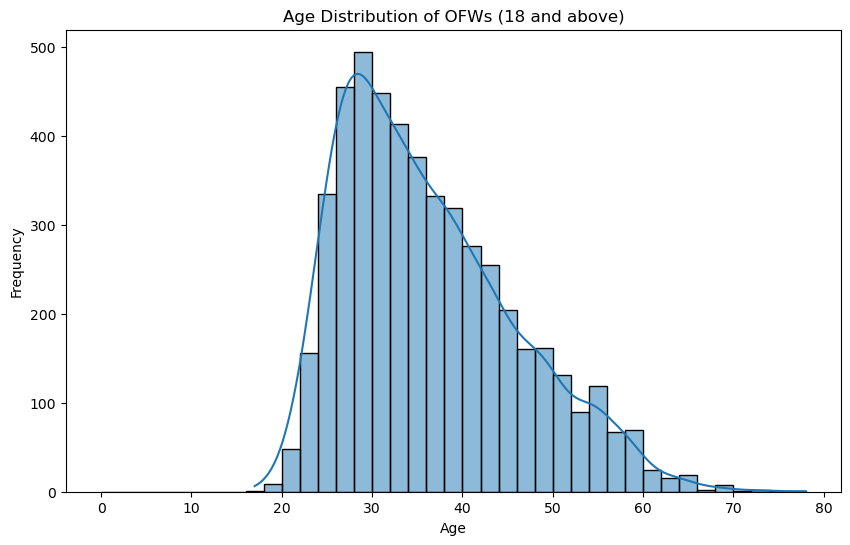

In [84]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='RQ4_AGE', kde=True, bins=np.arange(0, 80, 2))
plt.title('Age Distribution of OFWs (18 and above)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

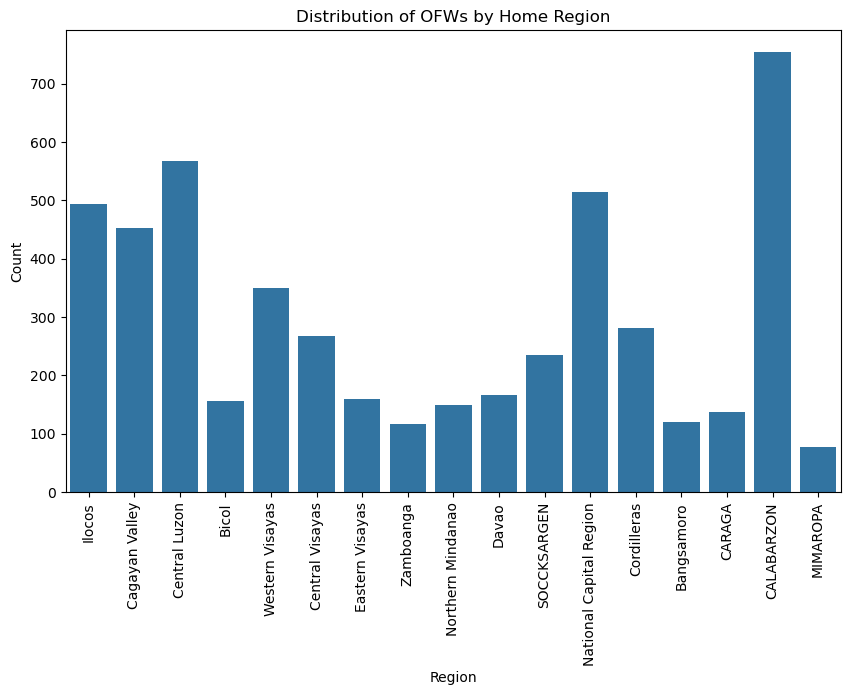

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='RREG')
plt.title('Distribution of OFWs by Home Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


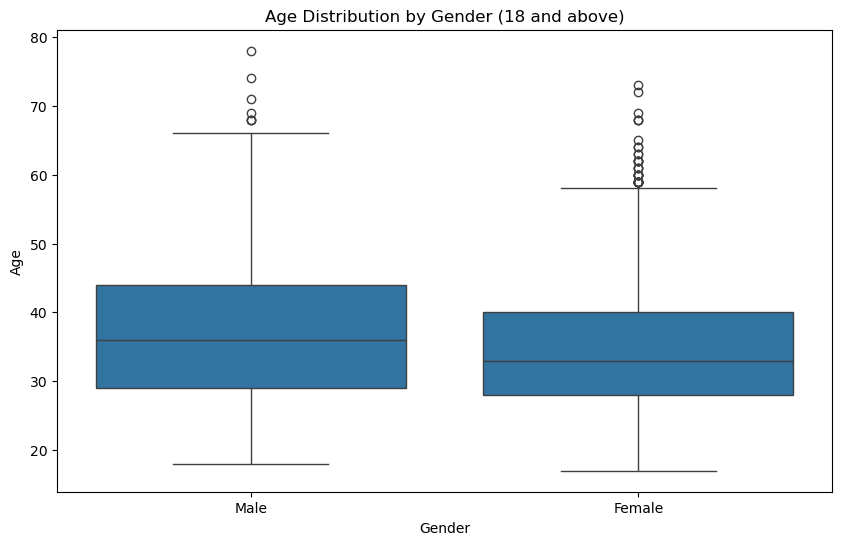

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RQ3_SEX', y='RQ4_AGE', data=data)
plt.title('Age Distribution by Gender (18 and above)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

#### Q2: What are the most common countries OFWs work in and how long do they stay in these countries?

We aim to identify the most frequent destinations for OFWs and examine the duration of their employment. We hope to analyze the trends related to their length of stay abroad. This will provide us with insights into migration patterns.

##### Numerical Summaries

In [87]:
unique_rq12_ctry = data['RQ12_CTRY'].unique()
unique_rq12_ctry

['Taiwan', 'Saudi Arabia', 'United Arab Emirates', 'East Asia, other', 'Malaysia', ..., 'Japan', 'Australia', 'SE and SC Asia, other', 'Africa', 'Other countries']
Length: 17
Categories (17, object): ['Africa', 'Hong Kong', 'Japan', 'Taiwan', ..., 'Australia', 'Europe', 'North and South America', 'Other countries']

In [88]:
country_counts = data['RQ12_CTRY'].value_counts()
print(country_counts)

RQ12_CTRY
Saudi Arabia               1217
United Arab Emirates        739
Europe                      356
Hong Kong                   333
North and South America     318
Kuwait                      293
Singapore                   289
Qatar                       269
West Asia, other            243
Taiwan                      212
Malaysia                    177
Japan                       171
East Asia, other            136
SE and SC Asia, other        98
Australia                    80
Africa                       65
Other countries               5
Name: count, dtype: int64


In [89]:
stay_stats = data.groupby('RQ12_CTRY', observed=False)['RQ16_NOMONTH'].describe()
print(stay_stats)

                          count       mean        std  min    25%   50%  \
RQ12_CTRY                                                                 
Africa                     65.0  29.046154  15.207349  0.0  19.00  28.0   
Hong Kong                 333.0  30.102102  17.653332  0.0  15.00  29.0   
Japan                     171.0  27.678363  17.692024  0.0  12.00  28.0   
Taiwan                    212.0  24.127358  15.169744  0.0  12.00  22.0   
East Asia, other          136.0  25.639706  15.749273  0.0  12.00  26.0   
Malaysia                  177.0  24.090395  16.093928  0.0  10.00  24.0   
Singapore                 289.0  29.349481  17.130393  0.0  15.00  30.0   
SE and SC Asia, other      98.0  27.887755  16.944350  0.0  14.00  26.0   
Kuwait                    293.0  25.259386  15.999389  0.0  12.00  24.0   
Qatar                     269.0  25.933086  16.480291  0.0  12.00  25.0   
Saudi Arabia             1217.0  26.676253  16.725297  0.0  12.00  24.0   
United Arab Emirates     

The average number of months worked falls between 25 and 45 months over a 5-year period (2011-2015).

In many countries, the maximum work duration is 60 months, indicating that some OFWs worked continuously for the entire 5-year period without interruption.

Countries like Saudi Arabia and UAE have large OFW populations and similar work durations (around 26-30 months on average), which shows longer employment in these countries. For countries such as Malaysia and Taiwan, the average number of months worked is lower (around 24 months), which could suggest shorter employment.

##### Visualization

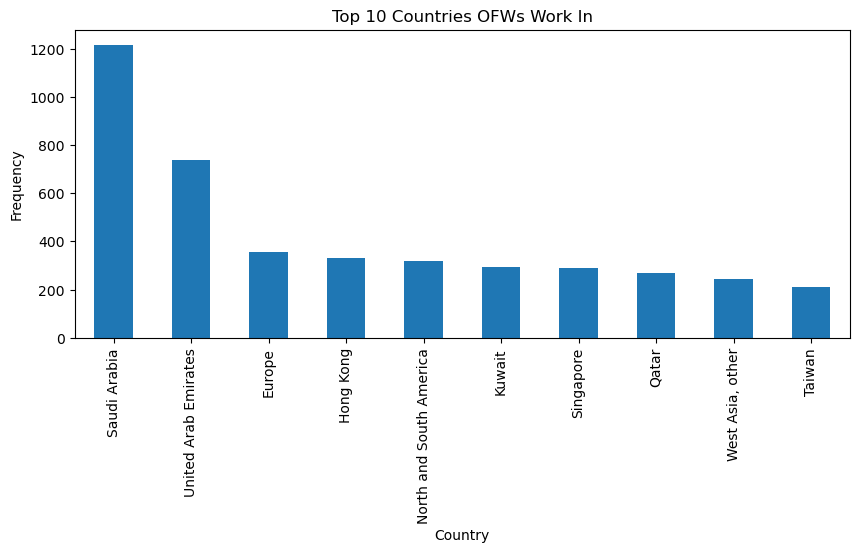

In [90]:
plt.figure(figsize=(10,4))
country_counts[:10].plot(kind='bar')
plt.title('Top 10 Countries OFWs Work In')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

We used the bar graph to visualize the concentration of OFWs. For simplicity, we only observed the top 10 countries. Based on the graph, Saudi Arabia came in the top country that OFWs work in.

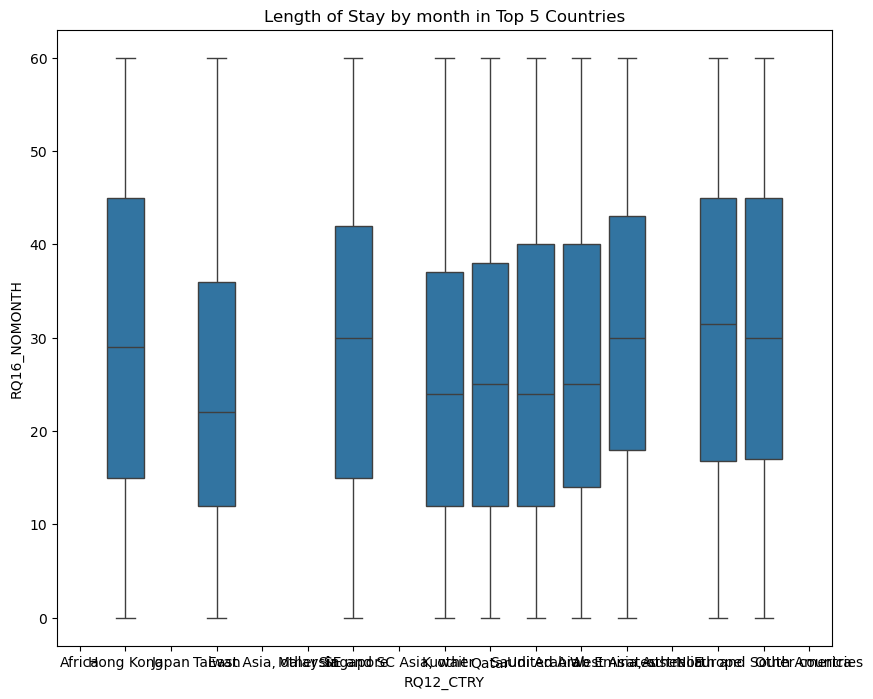

In [91]:
top_countries = data['RQ12_CTRY'].value_counts().index[:10]

plt.figure(figsize=(10,8))
sns.boxplot(data=data[data['RQ12_CTRY'].isin(top_countries)], x='RQ12_CTRY', y='RQ16_NOMONTH')
plt.title('Length of Stay by month in Top 5 Countries')
plt.show()

We used a box plot to represent the distribution of the length of stay (in months) for the top 10 countries. This analysis provides a detailed look at how stay durations vary by country. It is useful for comparing the distributions across countries and identifying patterns in the length of stay in our data.

#### Q3: What are the most common types of jobs that OFWs do abroad

We hope to determine if there is a trend in the types of jobs that OFWs hold, which could help us identify which jobs are easier to obtain or if many people in clerical roles are migrating for work abroad.

Occupation_Abroad_Category
Clerks                                      258
Trades and Related Workers                  164
Professionals                               147
Laborers and Unskilled Workers               50
Officials and Managers                       46
Plant and Machine Operators                  46
Farmers, Forestry Workers, and Fishermen     42
Technicians and Associate Professionals      42
Special Occupations                          24
Name: count, dtype: int64


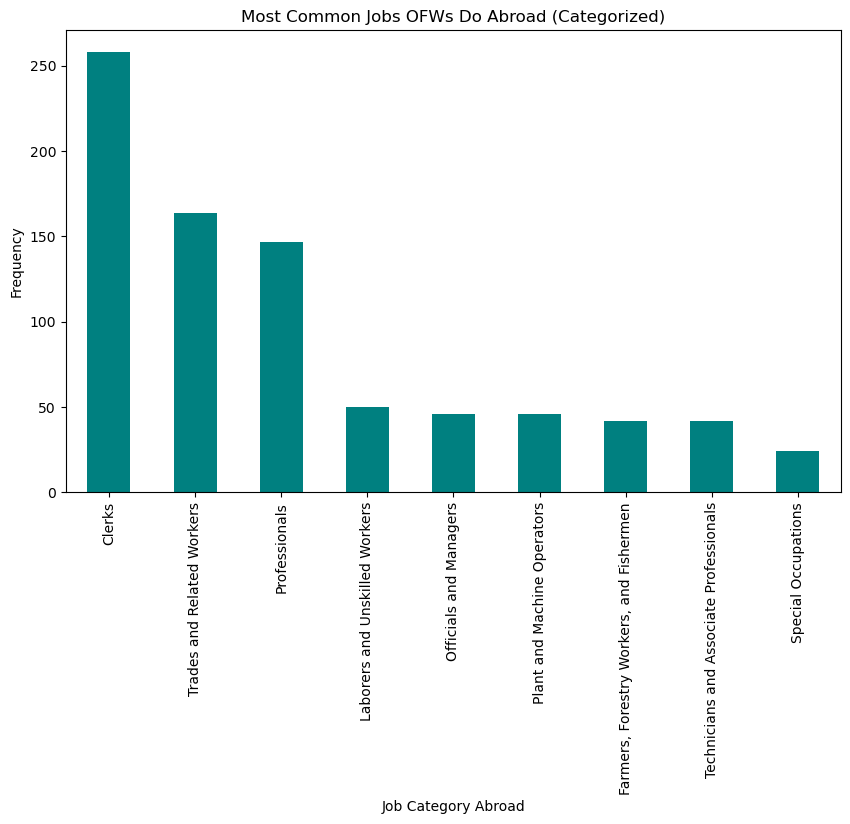

In [92]:

data['Occupation_Abroad_Category'] = data['RQ15_OCCUP1'].map(occupation_category_mapping)


abroad_job_counts = data['Occupation_Abroad_Category'].value_counts()
print(abroad_job_counts)

plt.figure(figsize=(10, 6))
abroad_job_counts.plot(kind='bar', color='teal')
plt.title('Most Common Jobs OFWs Do Abroad (Categorized)')
plt.xlabel('Job Category Abroad')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


We used a bar graph to show the distribution of various occupations of OFWs. The most frequent occupation are clerks with 258 individuals, making up the largest group in this category. Special Occupations, The smallest category, with only 24 individuals.


#### Q5: What is the distribution of cash remittances? How much do OFWs typically send home?

We hoped to understand the financial contributions of Overseas Filipino Workers to their families and the economy. By analyzing the distribution of remittances, we aim to identify typical remittance amounts and any trends in how much OFWs send home. This information can provide insights into the financial well-being of OFWs.

In [93]:

cash_remittance_stats = data['RQ22_CASHAMT'].describe()

cash_remittance_skewness = data['RQ22_CASHAMT'].skew()
cash_remittance_mode = data['RQ22_CASHAMT'].mode()[0]

print("Descriptive Statistics:")
print(cash_remittance_stats)
print(f"Skewness: {cash_remittance_skewness}")
print(f"Mode: {cash_remittance_mode}")


Descriptive Statistics:
count      3953.000000
mean      64008.120921
std       67590.438818
min        1300.000000
25%       29000.000000
50%       47000.000000
75%       77000.000000
max      966000.000000
Name: RQ22_CASHAMT, dtype: float64
Skewness: 4.296536063822258
Mode: 60000.0


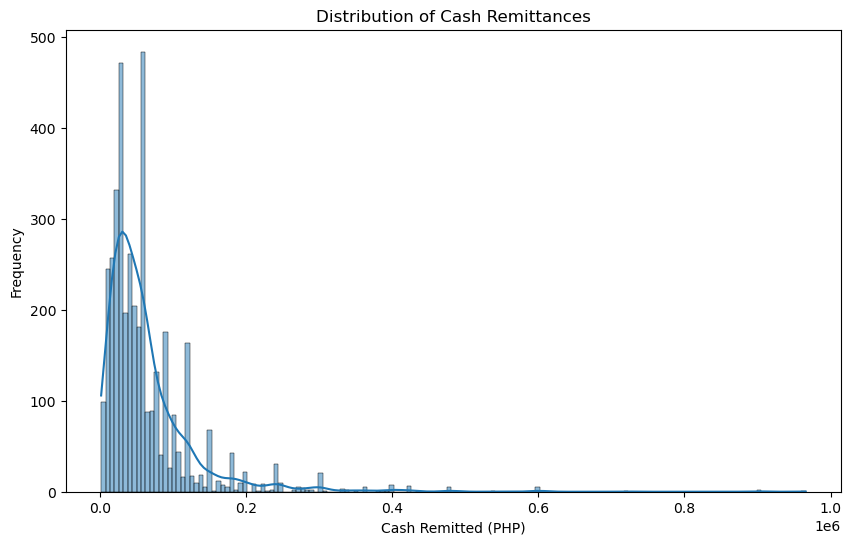

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(data['RQ22_CASHAMT'], kde=True)
plt.title('Distribution of Cash Remittances')
plt.xlabel('Cash Remitted (PHP)')
plt.ylabel('Frequency')
plt.show()


We used a histogram to shows the distribution of cash remittances. As shown on the graph it is exhibiting a positive skew. The skewness of the distribution is 4.29, which indicates that most remittances are concentrated in the lower range, with a few very large remittances.
The majority of remittances fall below the mean value of 64,008 reflecting the skewness. We can observe that the histogram confirms that a small number of OFWs are sending significantly higher amounts of money compared to the others.

Because our histogram exhibited a positive skew, we will implement a log transformation and re-visualize the transformed distribution with a histogram to improve our analysis.

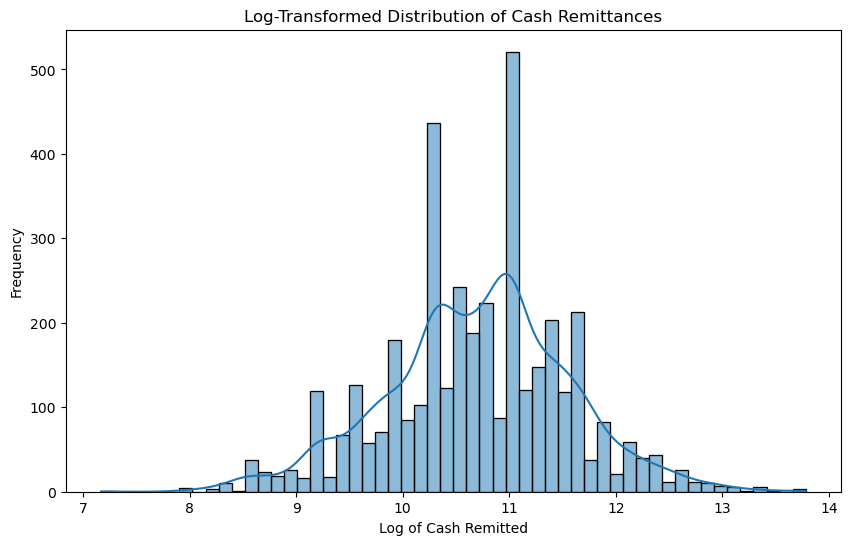

In [95]:

data['Log_CashRemittances'] = np.log1p(data['RQ22_CASHAMT']) 

plt.figure(figsize=(10, 6))
sns.histplot(data['Log_CashRemittances'], kde=True)
plt.title('Log-Transformed Distribution of Cash Remittances')
plt.xlabel('Log of Cash Remitted')
plt.ylabel('Frequency')
plt.show()

In [96]:
log_transformed_stats = data['Log_CashRemittances'].describe()

log_remittance_skewness = data['Log_CashRemittances'].skew()
log_remittance_mode = data['Log_CashRemittances'].mode()[0]

print("Descriptive Statistics:")
print(log_transformed_stats)
print(f"Skewness: {log_remittance_skewness}")
print(f"Mode: {log_remittance_mode}")

Descriptive Statistics:
count    3953.000000
mean       10.702781
std         0.859983
min         7.170888
25%        10.275086
50%        10.757924
75%        11.251574
max        13.780920
Name: Log_CashRemittances, dtype: float64
Skewness: -0.12305289755900067
Mode: 11.002116507732017


After applying the log transformation to fix the positive skewness in the cash remittance data, we observed that the distribution has become more symmetric, as indicated by the skewness value (-0.12). This suggests that the data is now more normally distributed.

We also used the Interquartile range to identify and remove outliers from the cash remittance data to provide a clearer view of the typical values.

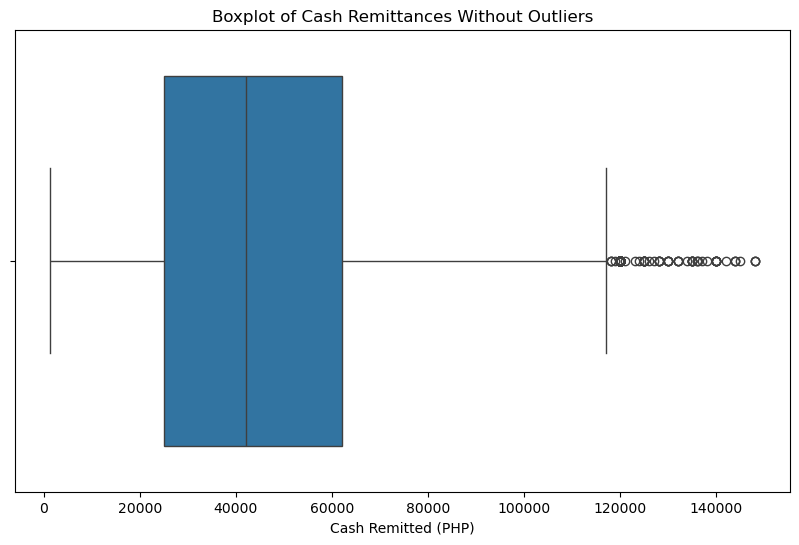

In [97]:

Q1 = data['RQ22_CASHAMT'].quantile(0.25)
Q3 = data['RQ22_CASHAMT'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data[(data['RQ22_CASHAMT'] >= lower_bound) & (data['RQ22_CASHAMT'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['RQ22_CASHAMT'])
plt.title('Boxplot of Cash Remittances Without Outliers')
plt.xlabel('Cash Remitted (PHP)')
plt.show()


####  Q6: OFWs in certain countries remit more money compared to those in other countries.

We hope to gain a deeper understanding into which countries remit higher amounts of money compared to others. To achieve this, we will group the data by country and remittance amounts, allowing us to compare the remittances across different countries. We utilized both a box plot and a bar chart to visualize the average cash remittances for each country. Through these, we hope to detect a trends on whether certain countries consistently send higher remittances or if there are significant variations in remittance behavior between countries. Additionally, it would help us identify the outliers.

                         count           mean            std     min      25%  \
RQ12_CTRY                                                                       
Africa                    44.0  101068.181818   86659.826192  6000.0  39500.0   
Hong Kong                285.0   44661.403509   33699.588090  4000.0  24000.0   
Japan                    123.0   88169.235772  113403.219048  8000.0  39850.0   
Taiwan                   164.0   45686.585366   35339.097944  3500.0  20000.0   
East Asia, other         107.0   85523.364486   75003.848429  5000.0  30500.0   
Malaysia                 130.0   36666.538462   32147.237207  4000.0  15000.0   
Singapore                231.0   61038.528139   57903.476921  6000.0  30000.0   
SE and SC Asia, other     73.0   63987.671233   59324.240748  5000.0  30000.0   
Kuwait                   237.0   41573.839662   30273.428930  4000.0  20000.0   
Qatar                    206.0   55880.097087   59349.379284  1300.0  25250.0   
Saudi Arabia             992

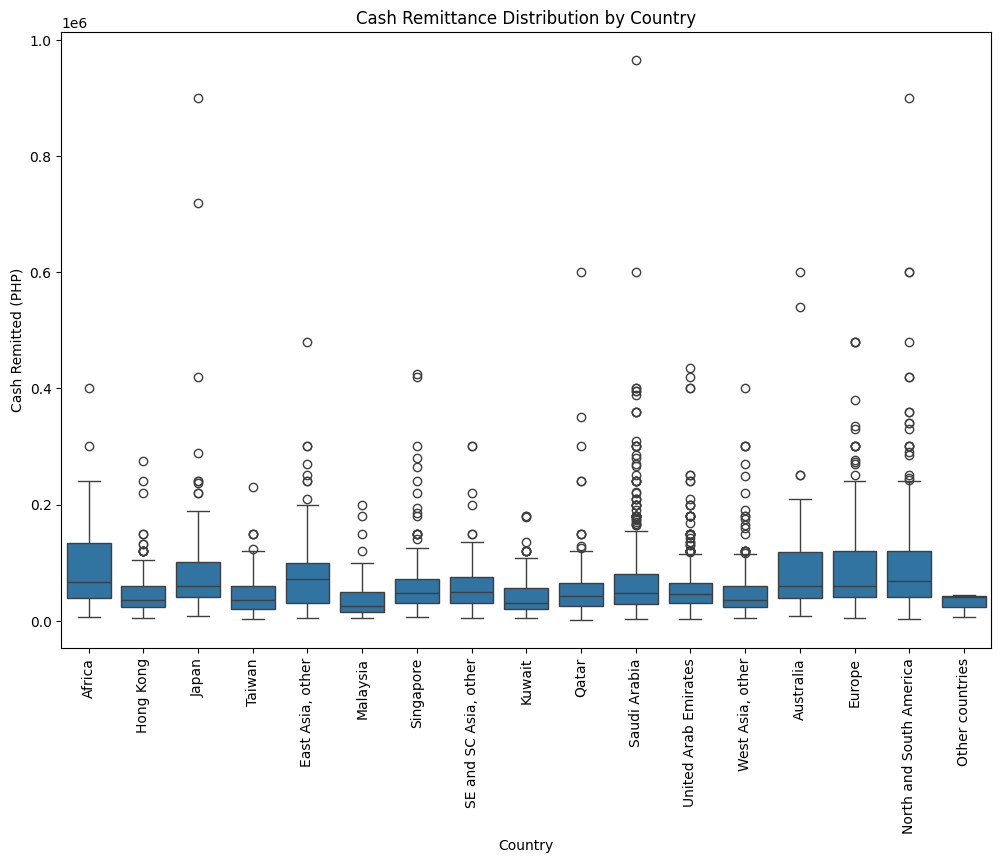

In [42]:
remittance_by_country = data.groupby('RQ12_CTRY', observed=False)['RQ22_CASHAMT'].describe()

print(remittance_by_country)

plt.figure(figsize=(12, 8))
sns.boxplot(x='RQ12_CTRY', y='RQ22_CASHAMT', data=data)
plt.title('Cash Remittance Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Cash Remitted (PHP)')
plt.xticks(rotation=90)
plt.show()

avg_remittance_by_country = data.groupby('RQ12_CTRY', observed=False)['RQ22_CASHAMT'].mean().sort_values(ascending=False)



We used a box plot to understand the overall distribution and spread of remittances within each country. Based on the graph, we can see a few outliers (308 outliers were detected, among others). We will be capping the outliers.

In [99]:

Q1 = data['RQ22_CASHAMT'].quantile(0.25)
Q3 = data['RQ22_CASHAMT'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['RQ22_CASHAMT'] < lower_bound) | (data['RQ22_CASHAMT'] > upper_bound)]

print(f"Number of outliers detected: {outliers.shape[0]}")
outliers.head()


Number of outliers detected: 308


,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND,Occupation_Category,Occupation_Abroad_Category,Log_CashRemittances
62,Ilocos,57,2,21314,123,26,7,5,Male,44,5,4.0,2015.0,2.0,College graduate,813,Contract Worker,1.0,Malaysia,12.0,True,142.0,50.0,False,NaN,NaN,NaN,4.0,2016.0,1,150000.0,1.0,True,80.0,False,NaN,True,20.0,False,NaN,False,NaN,False,NaN,False,NaN,478.4997,True,Trades and Related Workers,Trades and Related Workers,11.918397
143,Ilocos,125,2,21321,314,26,6,2,Female,43,4,10.0,2014.0,2.0,High school graduate,21,Contract Worker,1.0,Europe,14.0,True,913.0,55.0,False,NaN,NaN,NaN,12.0,2015.0,1,180000.0,1.0,True,90.0,True,10.0,False,NaN,False,NaN,False,NaN,False,NaN,True,6500.0,478.2327,True,NaN,NaN,12.100718
166,Ilocos,143,1,23224,424,26,1,1,Male,38,3,11.0,2014.0,2.0,High school graduate,921,Contract Worker,2.0,Saudi Arabia,12.0,True,713.0,35.0,False,NaN,NaN,NaN,11.0,2015.0,1,174000.0,5.0,True,50.0,False,NaN,True,50.0,False,NaN,False,NaN,False,NaN,False,NaN,695.6909,True,NaN,NaN,12.066816
194,Ilocos,170,3,22203,444,28,3,3,Male,30,4,9.0,2014.0,2.0,College graduate,921,Contract Worker,2.0,Europe,10.0,True,314.0,40.0,True,8.0,2015.0,2.0,NaN,NaN,1,200000.0,1.0,True,40.0,False,NaN,True,60.0,False,NaN,False,NaN,True,500000.0,False,NaN,512.6429,True,NaN,NaN,12.206078
214,Ilocos,187,4,22227,457,28,5,3,Male,31,1,8.0,2014.0,1.0,College graduate,215,Contract Worker,1.0,Saudi Arabia,24.0,True,215.0,13.0,False,NaN,NaN,NaN,8.0,2016.0,1,155000.0,5.0,True,50.0,False,NaN,True,50.0,False,NaN,False,NaN,False,NaN,False,NaN,565.2217,True,Trades and Related Workers,Trades and Related Workers,11.951187


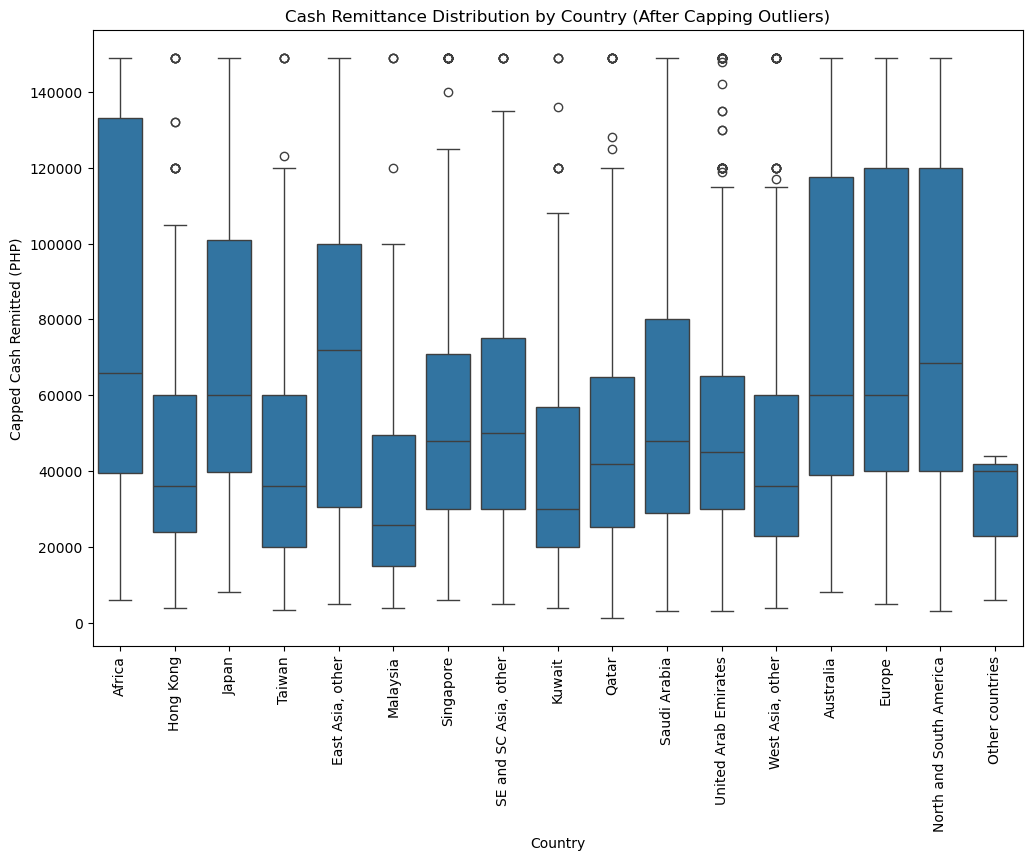

In [100]:
data['Capped_CashRemittances'] = data['RQ22_CASHAMT'].clip(lower_bound, upper_bound)

plt.figure(figsize=(12, 8))
sns.boxplot(x='RQ12_CTRY', y='Capped_CashRemittances', data=data)
plt.title('Cash Remittance Distribution by Country (After Capping Outliers)')
plt.xlabel('Country')
plt.ylabel('Capped Cash Remitted (PHP)')
plt.xticks(rotation=90)
plt.show()


Revisualizing the graph provides more focused analysis of typical remittance amounts. The highest medians were observed in countries like Qatar and the United Arab Emirates, indicating that OFWs in these countries tend to remit larger amounts of cash compared to other countries. In contrast, regions such as Africa and America displayed lower median remittance amounts.

The analysis reveals trends in remittance behavior that could be indicative of broader migration patterns and economic factors influencing OFWs. This provides valuable insights for policymakers and organizations involved in supporting the OFW community


## Research Question


Question: *How do demographic factors (e.g., age, gender, education) influence the frequency and amount of remittances by Overseas Filipino Workers (OFWs)?*

### Connection to EDA


During the exploratory data analysis (EDA) of the dataset, we observed that OFWs in different countries tend to remit varying amounts of cash at home. Additionally, the distribution of cash remittances showed high variability with significant outliers, and the dataset includes demographic information such as age, gender, and educational background of OFWs.

This observation investigates how demographic factors might influence remittance behaviors. For instance, we could hypothesize that younger OFWs or those with higher education levels may remit different amounts compared to older or less-educated OFWs.

### Importance and Significance


The importance of understanding the influence of demographic factors on remittance patterns is crucial for several reasons:

**1. Financial Literacy Programs:** This analysis will offer insights to develop tailored financial literacy programs for OFWs, helping them better manage their finances and lifestyles while maximizing the value of their remittances.

**2. Policy Development:** The information can help government officials, agencies, and financial institutions develop financial services and programs that address the specific needs of different demographic groups among overseas Filipino workers (OFWs). Policymakers can create more effective policies to support migrants and their families. By gaining a better understanding of this, we can enhance the positive impact of remittances on both the sending and receiving countries [(Carling, 2008)](https://doi.org/10.1093/oxrep/grn022). 

**3. Economic Forecasting Programs:** It identifies key factors affecting remittance behavior, enabling improved economic forecasting, particularly in countries like the Philippines where remittances significantly contribute to Gross Domestic Product (GDP).

**4. Socio-economic Factors:** Understanding demographic influences illuminates the social dynamics of remittance flows. Factors such as gender, age, and education level can influence how and why remittances are sent, thereby affecting family and community structures.

**5. Migration Studies:** Researchers can gain a deeper understanding of migration patterns and behaviors. This insight can inform broader studies on migration trends, integration, and the socio-economic impacts of migration. [(Bartolini, 2015)](https://openknowledge.worldbank.org/server/api/core/bitstreams/b8da5460-f4f8-5ad2-b88c-b7d54c597ce6/content). 